<a href="https://colab.research.google.com/github/Sandra-Su91/bigdata/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
ls



function (name, pos = -1L, envir = as.environment(pos), all.names = FALSE, 
    pattern, sorted = TRUE) 
{
    if (!missing(name)) {
        pos <- tryCatch(name, error = function(e) e)
        if (inherits(pos, "error")) {
            name <- substitute(name)
            if (!is.character(name)) 
                name <- deparse(name)
            warning(gettextf("%s converted to character string", 
                sQuote(name)), domain = NA)
            pos <- name
        }
    }
    all.names <- .Internal(ls(envir, all.names, sorted))
    if (!missing(pattern)) {
        if ((ll <- length(grep("[", pattern, fixed = TRUE))) && 
            ll != length(grep("]", pattern, fixed = TRUE))) {
            if (pattern == "[") {
                pattern <- "\\["
                warning("replaced regular expression pattern '[' by  '\\\\['")
            }
            else if (length(grep("[^\\\\]\\[<-", pattern))) {
                pattern <- sub("\\[<-", "\\\\\\[<-", pattern)
                warning("replaced '[<-' by '\\\\[<-' in regular expression pattern")
            }
        }
        grep(pattern, all.names, value = TRUE)
    }
    else all.names
}
<bytecode: 0x55f82c0f67e8>
<environment: namespace:base>

In [4]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(SportsAnalytics)

In [7]:
library(ggplot2)

In [9]:
NBA1718<- fetch_NBAPlayerStatistics("17-18")

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  


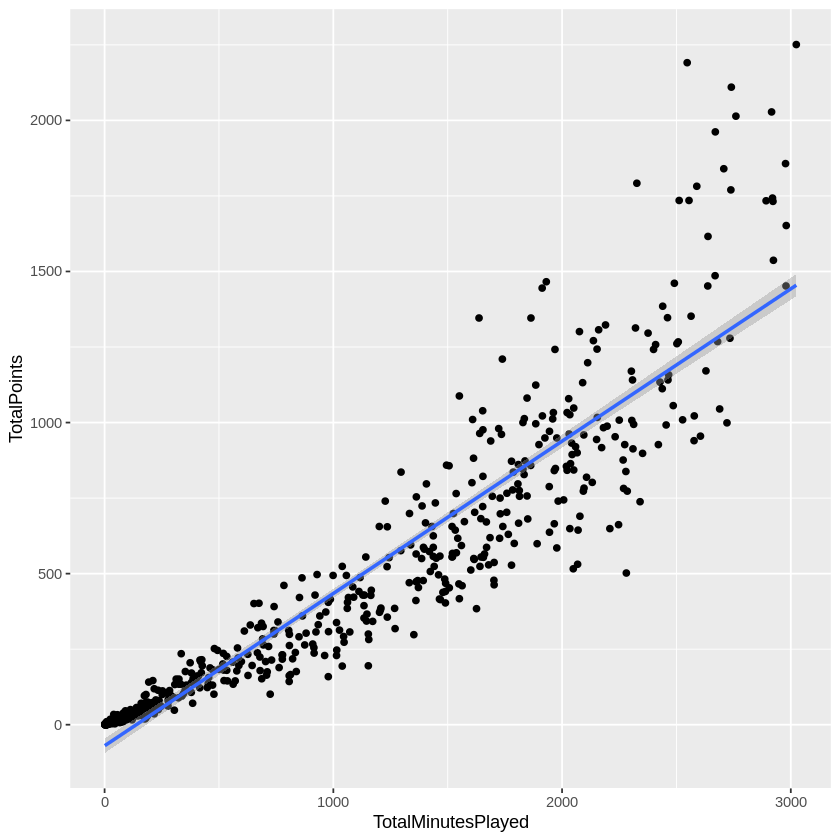

In [17]:
ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+geom_smooth(method = "glm")
lm(TotalPoints~TotalMinutesPlayed,data =NBA1718)

In [18]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1718)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  


In [36]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,data =NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           29.02535             -0.01681              1.31181  
         PositionPF           PositionPG           PositionSF  
          -29.81577            -57.56647            -39.12716  
         PositionSG  
          -58.55942  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    117300000 
Residual Deviance: 1963000 	AIC: 5966

In [37]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -12.081943            -0.009009             1.291930  

Degrees of Freedom: 539 Total (i.e. Null);  537 Residual
Null Deviance:	    117600000 
Residual Deviance: 2176000 	AIC: 6023

In [39]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [40]:
mydata$rank <- factor(mydata$rank)

In [48]:
mylogit<- glm(admit ~ gre + gpa + rank,
      data = mydata, family = "binomial")

In [49]:
sum<-summary(mylogit)

In [50]:
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [41]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
library(rpart)

In [46]:
DT <-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1718)

In [47]:
DT

n=539 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 539 398 SG (0.14 0.21 0.2 0.19 0.26)  
    2) Blocks>=36.5 108  68 C (0.37 0.29 0.037 0.23 0.074)  
      4) ThreesMade< 6 35   8 C (0.77 0.17 0 0.057 0) *
      5) ThreesMade>=6 73  48 PF (0.18 0.34 0.055 0.32 0.11)  
       10) Assists< 159.5 40  19 PF (0.12 0.53 0 0.33 0.025)  
         20) Steals< 64 33  13 PF (0.15 0.61 0 0.21 0.03) *
         21) Steals>=64 7   1 SF (0 0.14 0 0.86 0) *
       11) Assists>=159.5 33  23 SF (0.24 0.12 0.12 0.3 0.21)  
         22) Blocks>=60.5 15   7 C (0.53 0.13 0.067 0.2 0.067) *
         23) Blocks< 60.5 18  11 SF (0 0.11 0.17 0.39 0.33) *
    3) Blocks< 36.5 431 298 SG (0.086 0.19 0.24 0.18 0.31)  
      6) Assists< 151.5 337 238 SG (0.11 0.23 0.16 0.21 0.29)  
       12) ThreesMade< 2.5 113  79 PF (0.27 0.3 0.13 0.13 0.17)  
         24) Blocks>=1.5 49  24 C (0.51 0.35 0.041 0.041 0.061) *
         25) Blocks< 1.5 64  

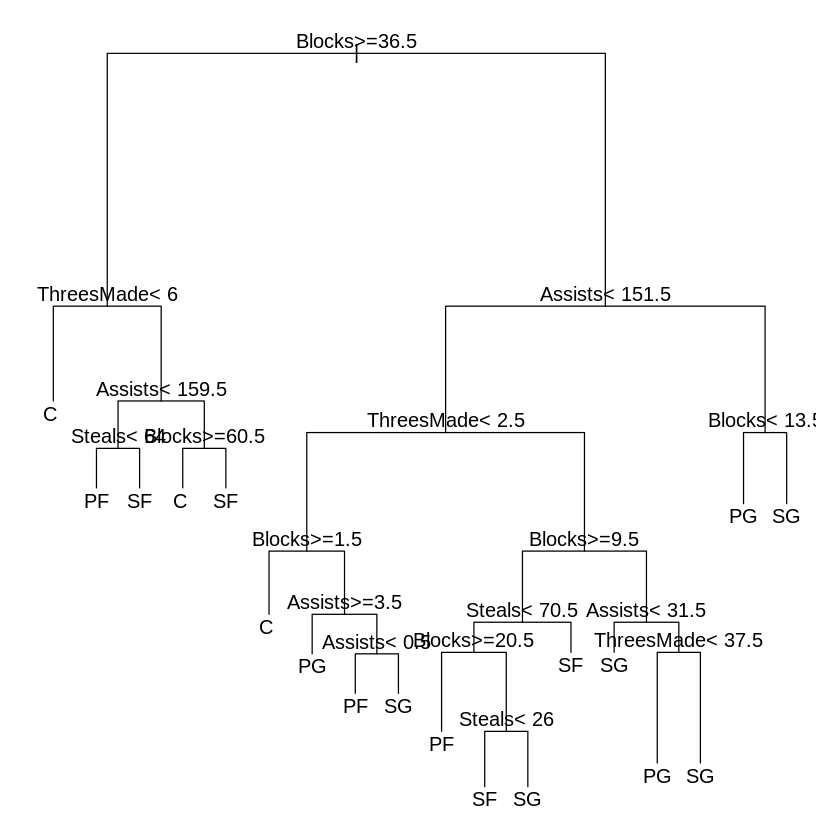

In [51]:
par(mfrow=c(1,1),mar = rep(1,4))
plot(DT)
text(DT, use.n=F,all=F, cex=1)

In [52]:
install.packages("rpart.plot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



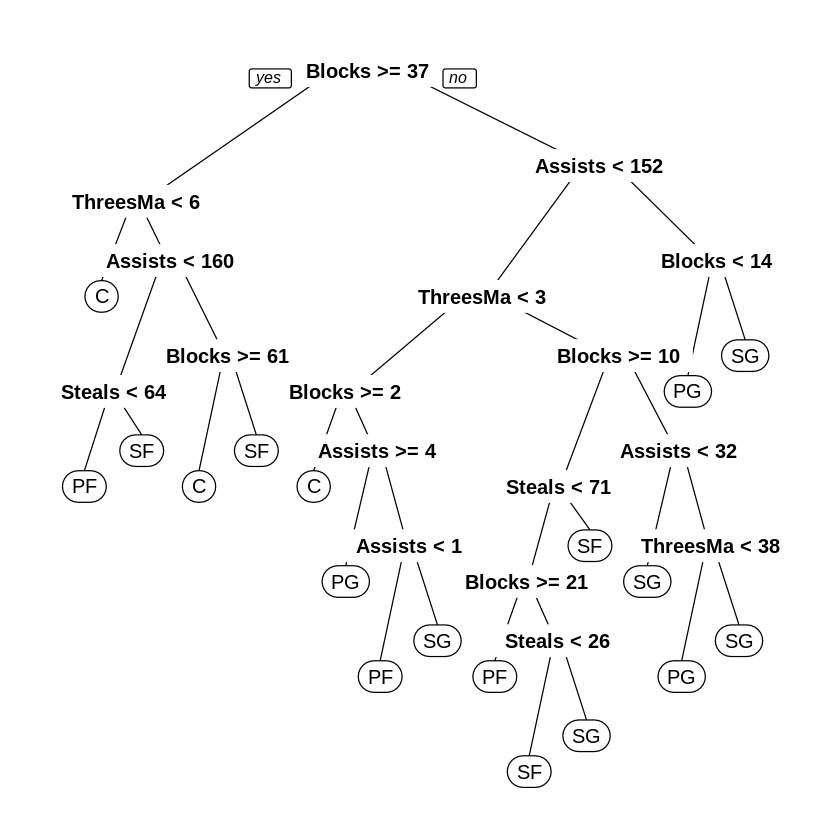

In [53]:
library(rpart.plot)
prp(DT)

In [57]:
install.packages("arules")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
library(arules)

In [60]:
insatll.packages("datasets")


ERROR: ignored

In [61]:
library(datasets)
data(Groceries)
Groceries@data@Dim

[1]  169 9835

In [65]:
rules<-apriori(Groceries,
        parameter = list(supp=0.001, conf = 0.8),
        control = list(verbose=F))

In [67]:
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [68]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [72]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
        appearance = list(default="lhs",rhs="whole milk"),
        control = list(verbose=F))
rulesR<-sort(rulesR, decreasing = TRUE,by="confidence")
inspect(rulesR[1:5])  

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [74]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
        appearance = list(default="lhs",rhs="bottled beer"),
        control = list(verbose=F))
rulesR<-sort(rulesR, decreasing = TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {soda,liquor}           => {bottled beer} 0.0012  0.57       0.0021    7.1
[3] {liquor}                => {bottled beer} 0.0047  0.42       0.0111    5.2
[4] {herbs,bottled water}   => {bottled beer} 0.0012  0.40       0.0031    5.0
[5] {whole milk,soups}      => {bottled beer} 0.0011  0.38       0.0029    4.7
    count
[1] 19   
[2] 12   
[3] 46   
[4] 12   
[5] 11   


In [75]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
        appearance = list(default="lhs",rhs="rice"),
        control = list(verbose=F))
rulesR<-sort(rulesR, decreasing = TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs    support confidence coverage lift count
[1] {root vegetables,                                                       
     other vegetables,                                                      
     whole milk,                                                            
     yogurt}                => {rice}  0.0013      0.169   0.0078   22    13
[2] {root vegetables,                                                       
     whole milk,                                                            
     butter}                => {rice}  0.0010      0.123   0.0082   16    10
[3] {root vegetables,                                                       
     other vegetables,                                                      
     yogurt}                => {rice}  0.0014      0.110   0.0129   14    14
[4] {root vegetables,                                                       
     whole milk,                                                            

In [76]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="whole milk"),
        control = list(verbose=F))
rulesR<-sort(rulesR, decreasing = TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [77]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
        appearance = list(default="rhs",lhs="yogurt"),
        control = list(verbose=F))
rulesR<-sort(rulesR, decreasing = TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs         rhs                support confidence coverage lift count
[1] {yogurt} => {whole milk}       0.056   0.40       0.14     1.6  551  
[2] {yogurt} => {other vegetables} 0.043   0.31       0.14     1.6  427  
[3] {yogurt} => {rolls/buns}       0.034   0.25       0.14     1.3  338  
[4] {yogurt} => {tropical fruit}   0.029   0.21       0.14     2.0  288  
[5] {yogurt} => {soda}             0.027   0.20       0.14     1.1  269  


In [ ]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(SportsAnalytics)

In [ ]:
library(ggplot2)

In [ ]:
NBA2021<- fetch_NBAPlayerStatistics("20-21")

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA2021)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -73.0029              0.5397  


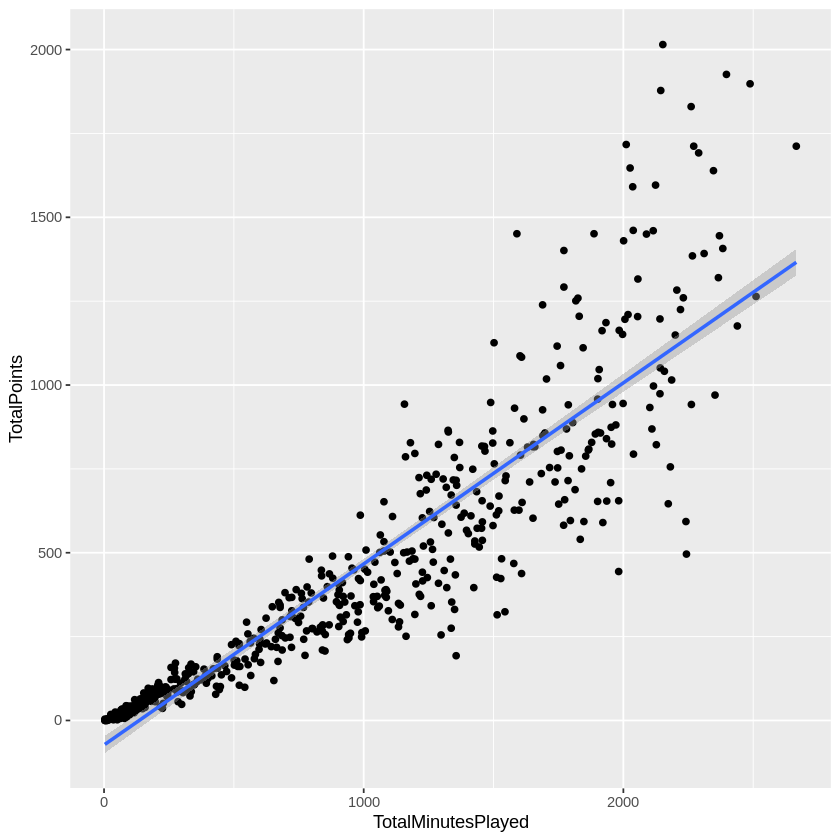

In [ ]:
ggplot(NBA2021,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+geom_smooth(method = "glm")
lm(TotalPoints~TotalMinutesPlayed,data =NBA2021)

In [ ]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA2021)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA2021)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -73.0029              0.5397  


In [ ]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA2021)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA2021)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -13.611253            -0.001834             1.311330  

Degrees of Freedom: 540 Total (i.e. Null);  538 Residual
Null Deviance:	    93720000 
Residual Deviance: 1980000 	AIC: 5982

In [ ]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [ ]:
mydata$rank <- factor(mydata$rank)

In [ ]:
mylogit<- glm(admit ~ gre + gpa + rank,
      data = mydata, family = "binomial")

In [ ]:
sum<-summary(mylogit)

In [ ]:
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107
